# Буканов Никита, Лабораторная работа №2

In [2]:
%matplotlib notebook

import numpy as np
import pandas as pd
import itertools
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

# Задание №1

Игроки А и В записывают цифры 1 и 2. Игра состоит в том, что, кроме своей цифры каждый игрок записывает еще и ту цифру, которую по его мнению, записал соперник. Если оба игрока угадали или оба ошиблись, то партия заканчивается вничью; если же угадал только один, то он получает столько очков, какова сумма записанных им цифр.

С помощью статистического моделирования убедительно(!) подтвердите и проиллюстрируйте графиками, что оптимальные смешанные стратегии игроков описываются следующими законами распределения:

$ p^*$=[0 3/5 2/5 0] и $ q^*$=[0 3/5 2/5 0]

Что можно сказать о цене игры?

In [52]:
def get_winner(A, B):
    AV = 0
    BV = 0
    
    if (A[1] == B[0]) and (B[1] != A[0]):
        AV = A[0] + A[1]

    if (B[1] == A[0]) and (A[1] != B[0]):
        BV = B[0] + B[1]
        
    return AV, BV

combinations = np.array(list(itertools.product(range(1,3), repeat=2)))
payment_matrix = pd.DataFrame(columns = [tuple(t) for t in combinations],
                              index = [tuple(t) for t in combinations])
for A in combinations:
    for B in combinations:
        A = tuple(A)
        B = tuple(B)
        AV, BV = get_winner(A, B)
        payment_matrix[B][A] = AV - BV

payment_matrix

,"(1, 1)","(1, 2)","(2, 1)","(2, 2)"
"(1, 1)",0,2,-3,0
"(1, 2)",-2,0,0,3
"(2, 1)",3,0,0,-4
"(2, 2)",0,-3,4,0


<IPython.core.display.Javascript object>


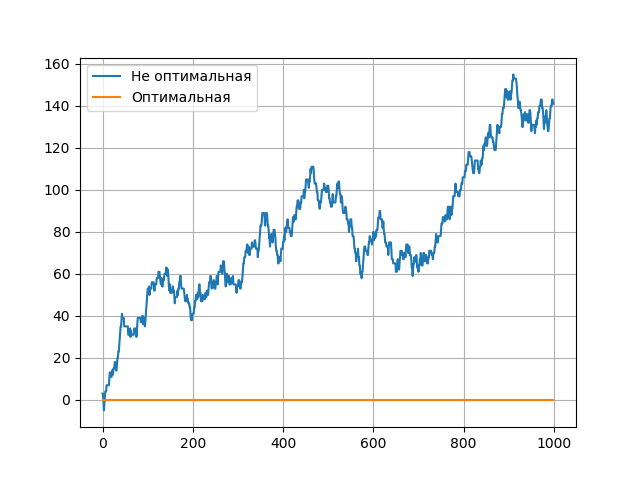

In [54]:
payment_matrix = np.array(payment_matrix)
A_action = np.random.choice(4, 1000, p=p_A)
B_action = np.random.choice(4, 1000, p=[1/4]*4)
A_action_opt = np.random.choice(4, 1000, p=p_A)
B_action_opt = np.random.choice(4, 1000, p=p_A)
res = payment_matrix[A_action, B_action]
res_opt = payment_matrix[A_action_opt, B_action_opt]
plt.figure()
plt.grid()
plt.plot(np.cumsum(res))
plt.plot(np.cumsum(res_opt))
plt.legend(['Не оптимальная', 'Оптимальная'])

# Задание №2

Конкурирующие фирмы А и В производят однородный сезонный товар, пользующийся спросом в течение n единиц времени. Доход от продажи товара в единицу времени составляет С ден. ед. Фирма В, будучи более состоятельной, в ходе конкурентной борьбы стремится вытеснить фирму А с рынка сбыта, способствуя своими действиями минимизации ее дохода, не считаясь при этом с временными потерями части своего дохода в надежде наверстать упущенное в будущем. Действующее законодательство не позволяет использовать для этого заведомое занижение цены на товар (прибегать к демпинговым ценам). Единственным допустимым способом достижения своей цели для фирмы В (как и для фирмы А в целях защиты своих интересов на рынке сбыта) остается повышение качества товара и надлежащий выбор момента времени поставки его на рынок сбыта. Уровень спроса на товар зависит от его качества, и в данный момент реализуется тот товар, качество которого выше. Повышение же качества требует дополнительных затрат времени на совершенствование технологии его изготовления и переналадку оборудования. Поэтому будем предполагать, что качество товара тем выше, чем позже он поступает на рынок.

С помощью статистического моделирования убедительно(!) подтвердите и проиллюстрируйте графиками, что оптимальные смешанные стратегии игроков описываются следующими законами распределения:

p*=[3/7 0 2/7 2/7 0] и q*=[0 2/7 4/7 1/7 0] 

Что можно сказать о цене игры?

In [55]:
n = 5
C = 100

combinations = np.arange(1, n+1)
payment_matrix = pd.DataFrame(columns = combinations, index = combinations)
for i in combinations:
    for j in combinations:
        if i < j:  
            payment_matrix[j][i] = C*(j-i)
        if i == j:  
            payment_matrix[j][i] = C*(n-i+1)/2
        if i > j:  
            payment_matrix[j][i] = C*(n-i+1)
payment_matrix

,1,2,3,4,5
1,250,100,200,300,400
2,400,200,100,200,300
3,300,300,150,100,200
4,200,200,200,100,100
5,100,100,100,100,50


In [56]:
p_A=[3/7, 0, 2/7, 2/7, 0]
p_B=[0, 2/7, 4/7, 1/7, 0]
payment_matrix = np.array(payment_matrix)

<IPython.core.display.Javascript object>


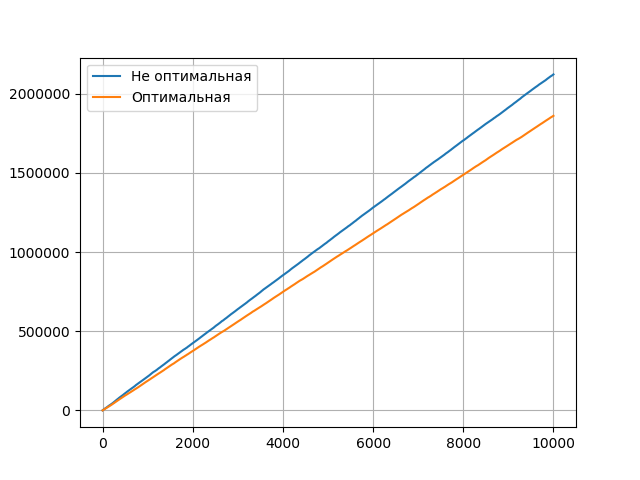

In [57]:
A_action = np.random.choice(5, 10000, p=p_A)
B_action = np.random.choice(5, 10000, p=[1/5]*5)
A_action_opt = np.random.choice(5, 10000, p=p_A)
B_action_opt = np.random.choice(5, 10000, p=p_B)
res = payment_matrix[A_action, B_action]
res_opt = payment_matrix[A_action_opt, B_action_opt]
plt.figure()
plt.grid()
plt.plot(np.cumsum(res))
plt.plot(np.cumsum(res_opt))
plt.legend(['Не оптимальная', 'Оптимальная'])

# Задание №3

In [3]:
combinations = np.array(range(6, 9))
payment_matrix = pd.DataFrame(columns = combinations, index = combinations)
f = {6 : 8.5,
     7 : 9.0,
     8 : 9.5}
for i in combinations:
    for j in combinations:
        payment_matrix[i][j] = -7.5*j
        if i > j:
            payment_matrix[i][j] = payment_matrix[i][j] - f[i]* (i-j)
payment_matrix

,6,7,8
6,-45,-54,-64
7,-52.5,-52.5,-62
8,-60,-60,-60


Точная нижняя цена игры: {{np.max(np.min(payment_matrix, axis = 0))}}

Точная верхняя цена игры {{np.min(np.max(payment_matrix, axis = 1))}}

In [4]:
p_B=np.array([1/4, 1/2, 1/4])

In [5]:
x = linprog(-np.ones(3), -payment_matrix, np.ones(3))
v = -1/x['fun']
p = x['x']*v

In [6]:
x = linprog(np.ones(3), payment_matrix.T, -np.ones(3))
v = 1/x['fun']
q = x['x']*v

In [7]:
p, q

(array([1., 0., 0.]), array([0., 0., 1.]))

In [8]:
payment_matrix = np.array(payment_matrix)
result = []
for i in range(3):
    result.append(np.sum(payment_matrix[i, np.random.choice(3, 1000, p=p_B)]))

<IPython.core.display.Javascript object>


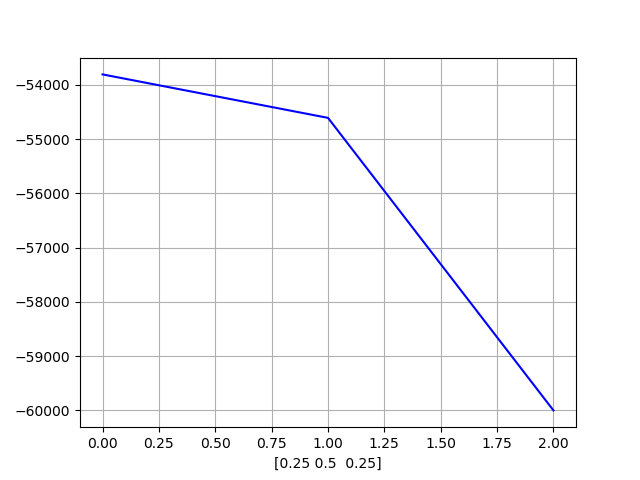

C:\Users\nikita\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


In [9]:
plt.figure()
plt.plot(result, 'b')
plt.grid()
plt.xlabel(p_B)
plt.show()

### Задание 5

Задание 4. Используя команду linprog решите следующие задачи линейного программирования(найти максимум и минимум целевой функции)для неотрицательных переменных х

1. $\begin{cases} 
f = 3x_1+2x_2 \\
x_1 + 2x_2\leq 7 \\
2x_1 + x_2 \leq 8 \\ 
x_2\leq 3 \end{cases}$

1. $\begin{cases} 
f = x_1+2x_2 \\
x_!2 + 2x_2\leq 7 \\
2x_1 + x_2 \leq 8 \\ 
x_2\leq 3 
x_1 + 2x_2 \leq 2\end{cases}$

1. $\begin{cases} 
f = -x_1-2x_2 \\
x_1 + x_2 \leq 1 \\
\end{cases}$


Используя графический метод решения задачи линейного программирования найдите решение и подтвердите ответы.

Усложните условия первых двух задач, преобразовав ограничения в виде ограничений равенств и смешанные (неравенства и равенства). Естественно размерность задачи возрастет.


<IPython.core.display.Javascript object>


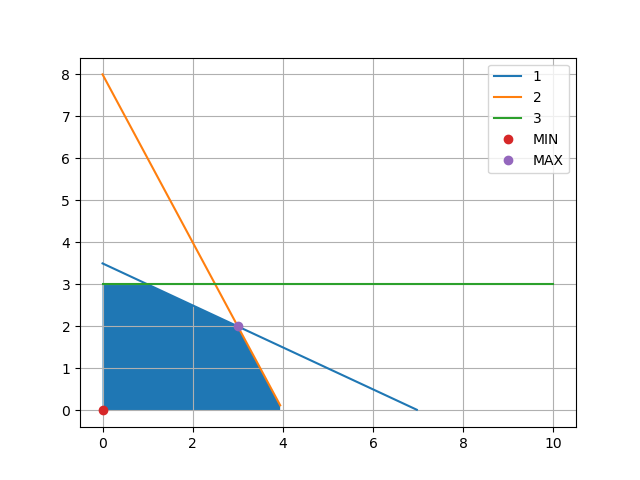

     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([7., 8., 3.])
  status: 0
 success: True
       x: array([0., 0.])


     fun: -13.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 1.])
  status: 0
 success: True
       x: array([3., 2.])

In [20]:
x = np.linspace(0,10, 100)
f1 = (7-x)/2
f2 = 8-2*x
fig = plt.figure()
plt.grid()
plt.plot(x[f1>=0], f1[f1>=0])
plt.plot(x[f2>=0], f2[f2>=0])
plt.plot(x, [3]*100)
fig.axes[0].fill_between(x[np.minimum(f1, np.minimum(f2, np.array([3]*100)))>=0],
                         0,
                         np.minimum(f1,
    np.minimum(f2, np.array([3]*100)))[np.minimum(f1, np.minimum(f2, np.array([3]*100)))>=0])
plt.plot(0,0,'o')
plt.plot(3,2,'o')
plt.legend(['1','2','3', "MIN", 'MAX'])
print(linprog([3,2], [[1,2], [2,1], [0,1]], [7,8,3]))
linprog([-3, -2], [[1,2], [2,1], [0,1]], [7,8,3])

In [21]:
x = np.linspace(0,10, 100)
print(linprog([3, 2, 0, 0, 0], [[1, 2, 1, 0, 0], [2, 1, 0, 1, 0], [0, 1, 0, 0, 1]], [7, 8, 3]))
linprog([-3, -2, 0, 0, 0], [[1, 2, 1, 0, 0], [2, 1, 0, 1, 0], [0, 1, 0, 0 ,1]], [7, 8, 3])

     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([7., 8., 3.])
  status: 0
 success: True
       x: array([0., 0., 0., 0., 0.])


     fun: -13.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 1.])
  status: 0
 success: True
       x: array([3., 2., 0., 0., 0.])

<IPython.core.display.Javascript object>


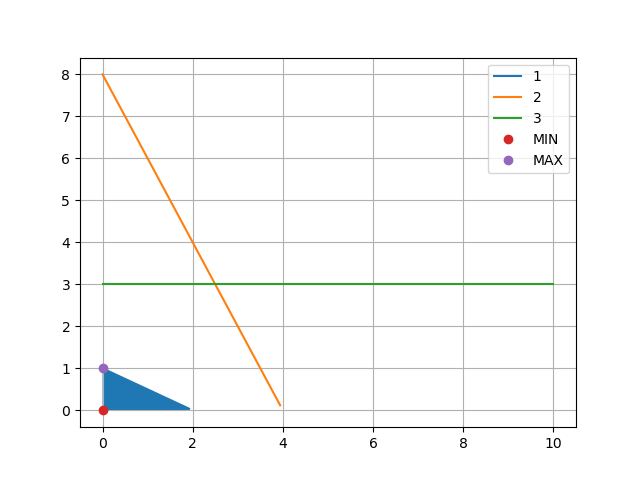

     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([2., 8., 3.])
  status: 0
 success: True
       x: array([0., 0.])


     fun: -2.0
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([0., 7., 2.])
  status: 0
 success: True
       x: array([0., 1.])

In [22]:
x = np.linspace(0,10, 100)
f1 = (2-x)/2
f2 = 8-2*x
fig = plt.figure()
plt.grid()
plt.plot(x[f1>=0], f1[f1>=0])
plt.plot(x[f2>=0], f2[f2>=0])
plt.plot(x, [3]*100)
fig.axes[0].fill_between(x[np.minimum(f1, np.minimum(f2, np.array([3]*100)))>=0],
                         0,
                         np.minimum(f1,
    np.minimum(f2, np.array([3]*100)))[np.minimum(f1, np.minimum(f2, np.array([3]*100)))>=0])
plt.plot(0,0,'o')
plt.plot(0,1,'o')
plt.legend(['1','2','3', "MIN", 'MAX'])
print(linprog([1,2], [[1,2], [2,1], [0,1]], [2,8,3]))
linprog([-1, -2], [[1,2], [2,1], [0,1]], [2,8,3])

<IPython.core.display.Javascript object>


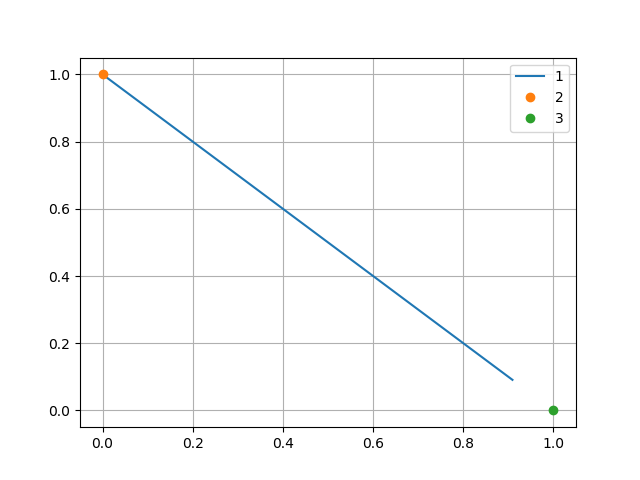

     fun: -2.0
 message: 'Optimization failed. The problem appears to be unbounded.'
     nit: 2
   slack: array([0.])
  status: 3
 success: False
       x: array([0., 1.])


     fun: 1.0
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([0.])
  status: 0
 success: True
       x: array([1., 0.])

In [23]:
x = np.linspace(0,10, 100)
f2 = 1-x
fig = plt.figure()
plt.grid()
plt.plot(x[f2>=0], f2[f2>=0])
plt.plot(0,1,'o')
plt.plot(1,0,'o')
plt.legend(['1','2','3', "MIN", 'MAX'])
print(linprog([-1, -2], [[-1,-1]], [-1]))
linprog([1, 2], [[-1,-1]], [-1])